`Clustering Antarctic Penguin Species`

`October 2025`

This project focuses on clustering Antarctic penguin species based on their physical characteristics. By analyzing a dataset containing measurements of penguins, we aim to identify distinct groups that may correspond to different species.

`Any questions, please reach out!`

Chiawei Wang, PhD\
Data & Product Analyst\
<chiawei.w@outlook.com>

`*` Note that the table of contents and other links may not work directly on GitHub.

[Table of Contents](#table-of-contents)
1. [Executive Summary](#executive-summary)
   - [Challenge](#challenge)
   - [Objectives](#objectives)
   - [Data Overview](#data-overview)
   - [Approach](#approach)
   - [Results](#results)
   - [Conclusion](#conclusion)
2. [Exploratory Data Analysis](#exploratory-data-analysis)

# Executive Summary

## Challenge

A team of researchers has collected data on penguins in Antarctica, including various physical measurements. However, they have not recorded the species of the penguins. The goal is to use clustering techniques to identify distinct groups within the dataset that may correspond to different penguin species.

## Objectives

1. Identify key physical characteristics that differentiate the penguin species.
2. Determine the number of distinct clusters within the dataset.
3. Calculate the average measurements for each cluster.

## Data Overview

| Index | Column              | Type     | Description                   |
| ----- | ------------------- | -------- | ----------------------------- |
| 0     | `culmen_length_mm`  | float64  | Culmen length in millimeters  |
| 1     | `culmen_depth_mm`   | float64  | Culmen depth in millimeters   |
| 2     | `flipper_length_mm` | float64  | Flipper length in millimeters |
| 3     | `body_mass_g`       | float64  | Body mass in grams            |  
| 4     | `sex`               | object   | Penguin sex                   |

## Approach

1. Perform preprocessing steps on the dataset to create dummy variables
2. Detect the optimal number of clusters for k-means clustering
3. Run the k-means clustering algorithm
4. Create a final statistical DataFrame for each cluster

## Results

The k-means clustering algorithm successfully identified 4 distinct clusters within the penguin dataset. The average measurements for each cluster are as follows:

| cluster | culmen_length_mm | culmen_depth_mm | flipper_length_mm | body_mass_g |
| ------- | ---------------- | --------------- | ----------------- | ----------- |
| 0       | 43.88            | 19.11           | 194.76            | 4006.60     |
| 1       | 45.56            | 14.24           | 212.71            | 4679.74     |
| 2       | 40.22            | 17.61           | 189.05            | 3419.16     |
| 3       | 49.47            | 15.72           | 221.54            | 5484.84     |

## Conclusion

The k-means clustering analysis of the penguin dataset revealed four distinct clusters based on physical measurements. Each cluster exhibited unique average characteristics, suggesting potential differentiation among penguin species. This clustering approach provides valuable insights for researchers studying penguin populations in Antarctica.

# Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in the CSV as a DataFrame
df = pd.read_csv('penguins.csv')

# Preview the data
print(df.shape)
df.head()

(332, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


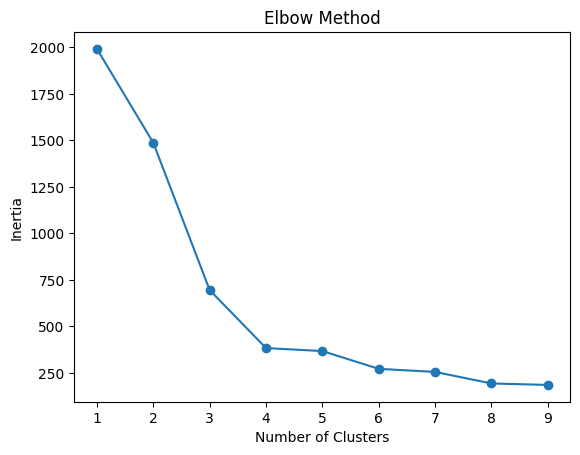

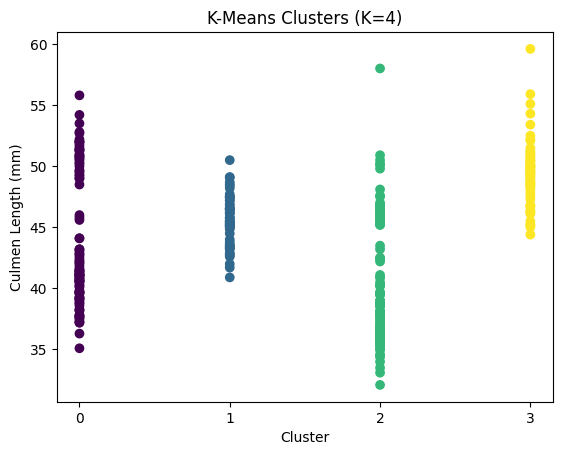

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.88,19.11,194.76,4006.60
1,45.56,14.24,212.71,4679.74
2,40.22,17.61,189.05,3419.16
3,49.47,15.72,221.54,5484.84


In [4]:
# Perform preprocessing steps on the dataset to create dummy variables
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, dtype='int64')

# Perform preprocessing steps on the dataset
# Scaling variables (also called standardizing) is recommended before performing a clustering algorithm since this can increase the performance greatly
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data = X,columns = df.columns)
penguins_preprocessed.head()

# Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters = 4

# Run the k-means clustering algorithm
# with the optimal number of clusters 
kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(penguins_preprocessed)
df['label'] = kmeans.labels_

# Visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(df['label'], df['culmen_length_mm'], c = kmeans.labels_)
plt.xlabel('Cluster')
plt.ylabel('Culmen Length (mm)')
plt.xticks(range(int(df['label'].min()), int(df['label'].max()) + 1))
plt.title(f'K-Means Clusters (K={n_clusters})')
plt.show()

# Create final stat_penguins DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'label']
stat_penguins = df[numeric_columns].groupby('label').mean().round(2)
stat_penguins

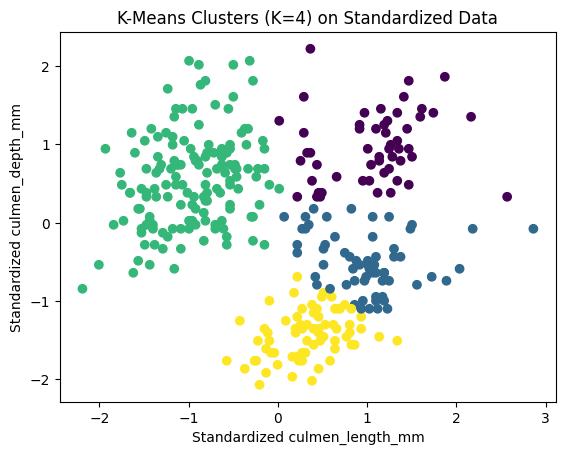

In [5]:
# Visualize clusters on standardized data
feature_x = 'culmen_length_mm'
feature_y = 'culmen_depth_mm'
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(penguins_preprocessed[[feature_x, feature_y]])

# Assign cluster labels to the standardized data
penguins_preprocessed['label'] = kmeans.labels_

# Scatter plot of the clusters
plt.figure()
plt.scatter(penguins_preprocessed[feature_x], penguins_preprocessed[feature_y], c = penguins_preprocessed['label'])
plt.xlabel(f'Standardized {feature_x}')
plt.ylabel(f'Standardized {feature_y}')
plt.title(f'K-Means Clusters (K={n_clusters}) on Standardized Data')
plt.show()